# WCPP: data collection

## Contents

- [Introduction](#introduction)
- [Libraries](#libraries)
- [Functions and settings](#functions_and_settings)
- [Datasets collection](#datasets_collection) 
  - [List of datasets](#list_of_datasets) 
  - [Data importing](#data_importing)
- [Datasets exploration](#datasets_exploration)
  - [Oxford Supertracker](#oxford_supertracker)
    - [Level of observation](#level_of_observation)
- [Conclusion](#conclusion)

## Introduction
<a id='introduction'></a>

<div class="alert-info">
This notebook finds, imports and discusses datasets that tracked policies by governments around the world towards the Covid-19 pandemic. It shows what data was collected around the period from early 2020 to late 2022, gauging the quality of information available to researchers investigating the decisions made by policy-makers. It also selects datasets that meet the needs of the Worldwide Covid Policy Project. 
<br>
      
Knowing the landscape of data available on policy-making during the pandemic is useful, because it defines some of the boundaries within which humanity will be able to learn from what it did during the spread of the disease. While further data can be created by retrospective collection; and the value of the quantitative information available is only realisable with qualitative, contextual understanding that is not recorded in the datasets; the pandemic has passed and it is fair to assume that a great majority of data on it has already been collected. Understanding the size and quality of the dataspace therefore guides what can be learned about the decisions made and programmes implemented, and may also prompt improvements in data collection ahead of future crises.   

The Worldwide Covid Policy Project seeks to address the following questions:
 
- 1) What was the policy space available to governments?
- 2) Which parts of the policy space did governments use?
- 3) Why did governments use parts of the policy space?

To find any answers to the questions, the project needs datasets that meet the following criteria:

- 1) The data cover the period from at least early 2020 to late 2022.
- 2) There is enough data to allow staistical confidence in any computation.
- 3) There are sufficient variables to proxy the policy space available to decision-makers.
- 4) Enough administrative areas are covered around the world to allow for insightful comparative research.     
- 5) The data is available on open principles, allowing others to replicate the analysis and findings. 

There are numerous datasets available, many of which were conveniently tracked by the <a href="https://supertracker.spi.ox.ac.uk/policy-trackers/" target="_blank">Oxford Supertracker</a>. These are considered below with the  <a href="https://opendatacharter.net/principles/" target="_blank">Open Data Charter</a> principle of the data being 'accessible and usable' in mind. The <a href="https://supertracker.spi.ox.ac.uk/surveys/" target="_blank">surveys</a> collected by the tracker are left for any research on policy conditions and effects.  
    
</div>

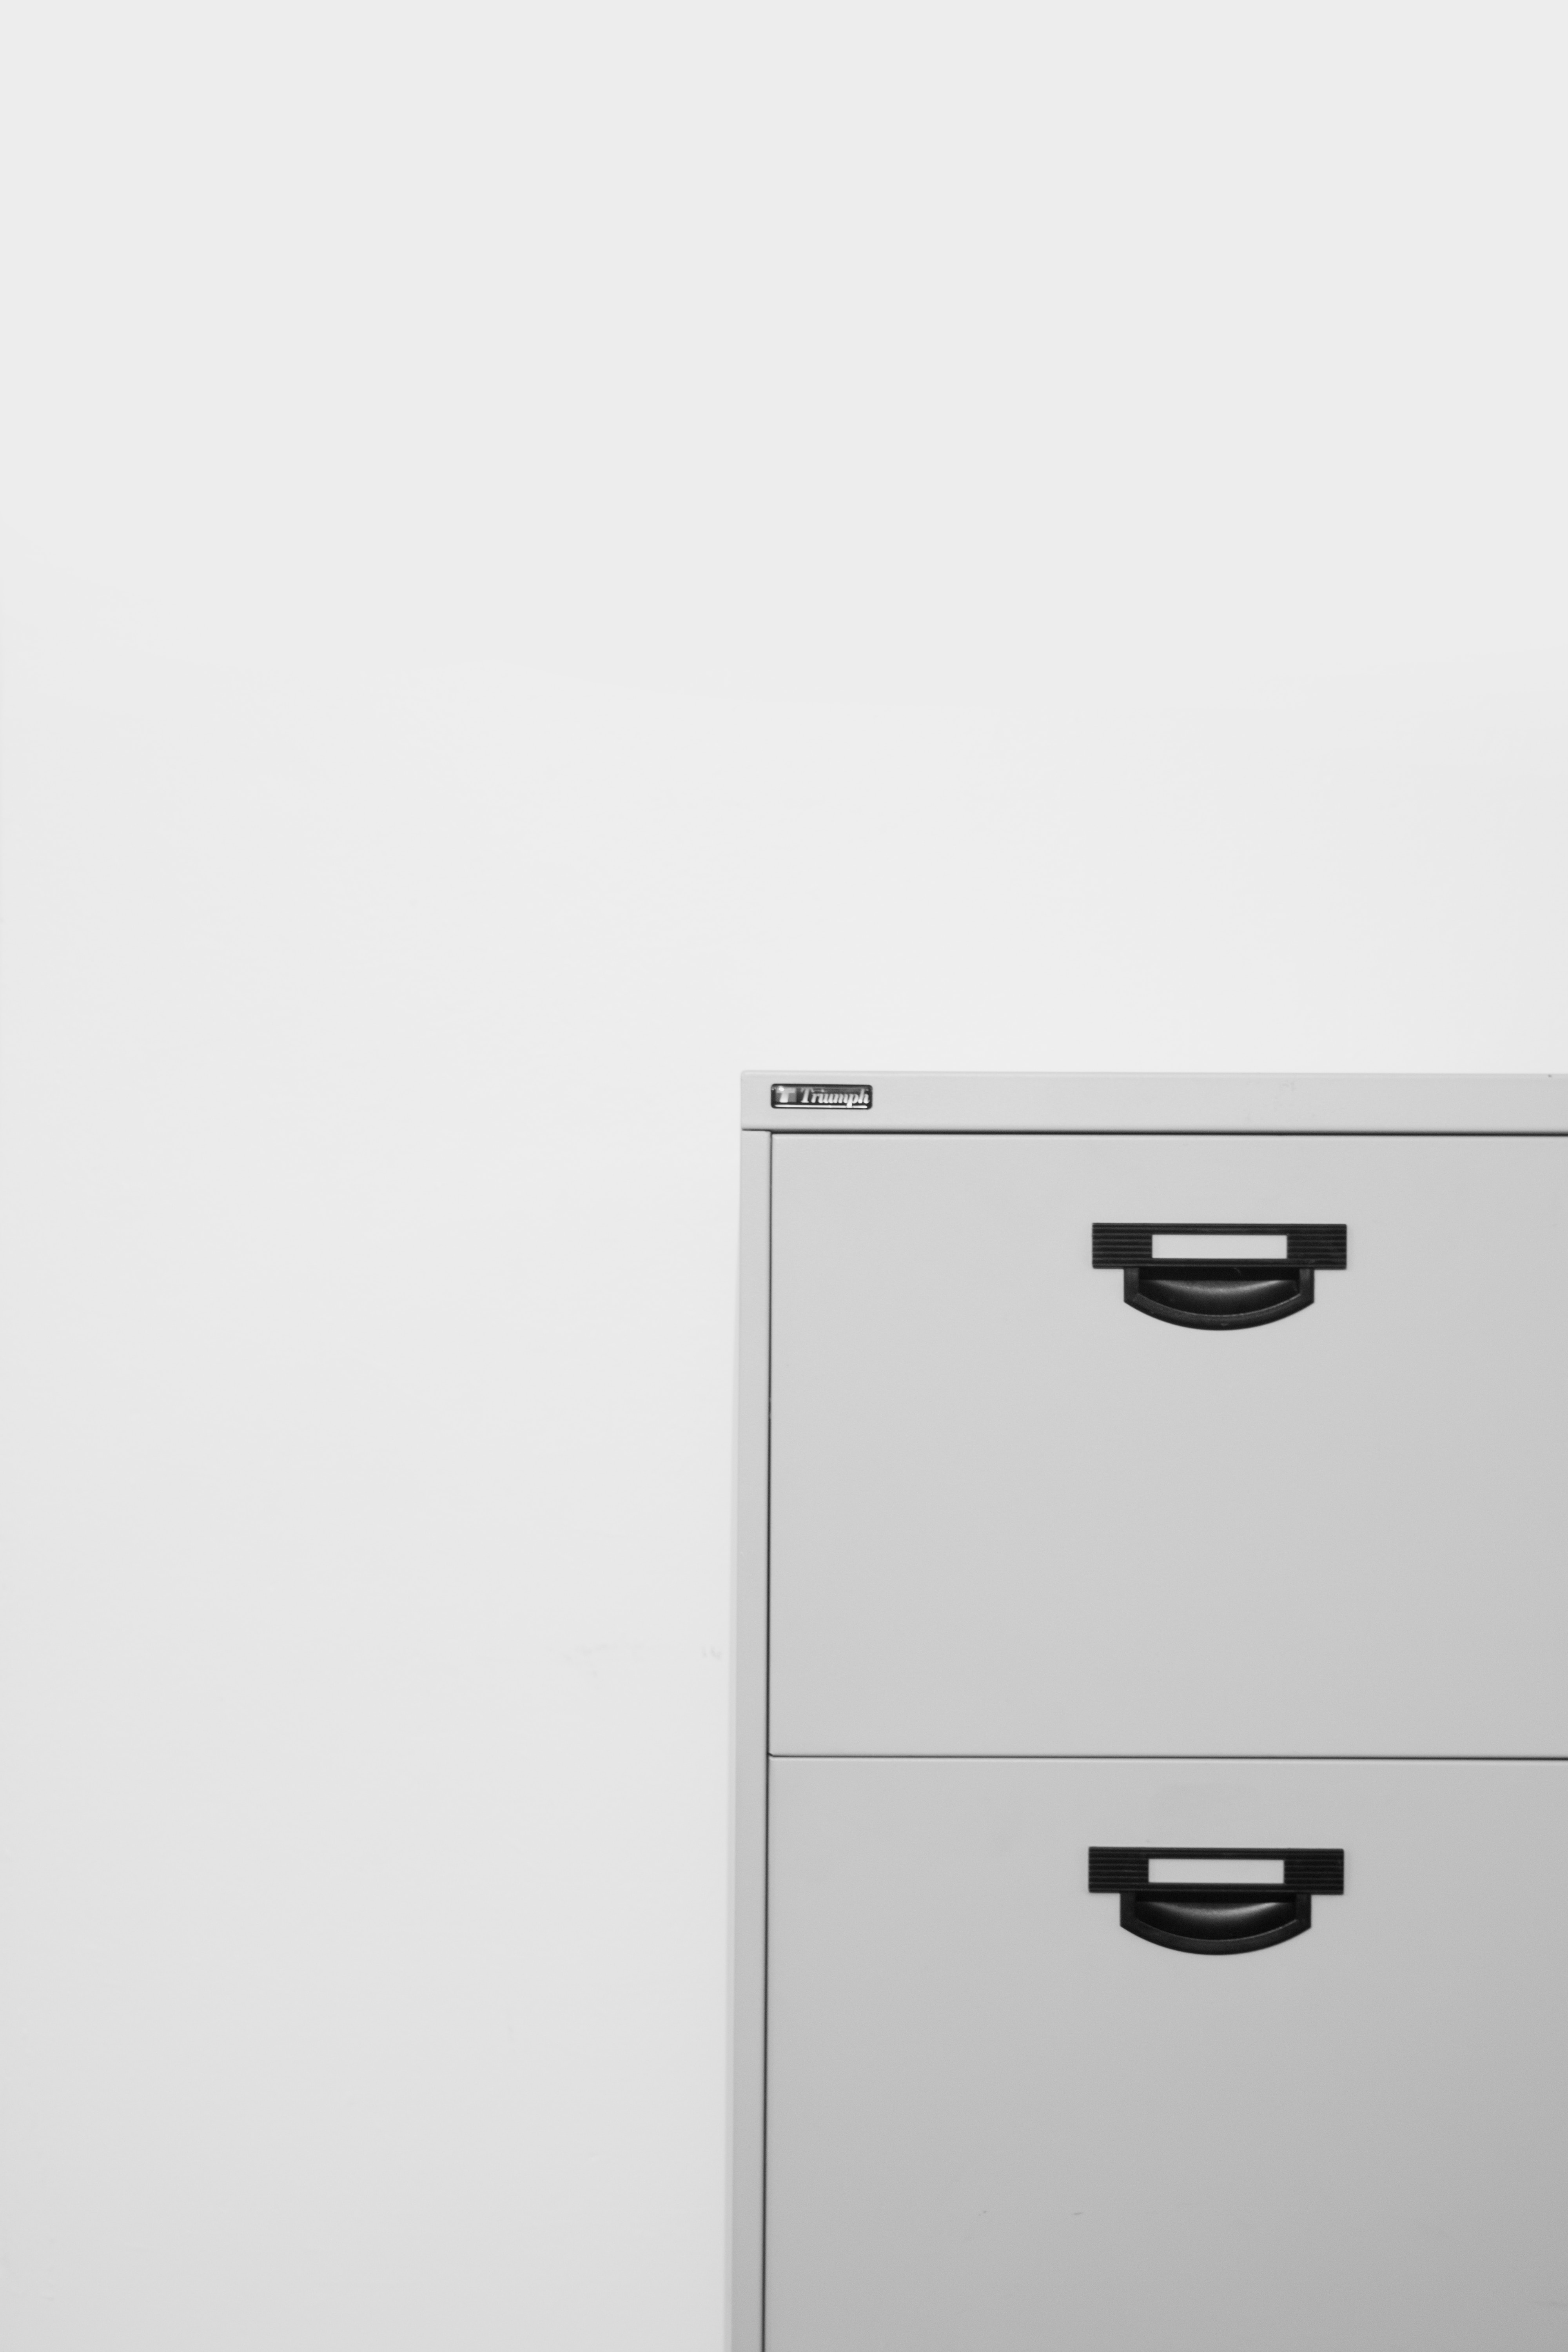

## Libraries
<a id='libraries'></a>

<div class="alert-info">
Importing libraries and packages that are used in the notebook. 
</div>

In [2392]:
# Imports packages for managing and manipulating data
import pandas as pd
import numpy as np

# Imports packages for visualising data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

## Functions and settings
<a id='functions_and_settings'></a>

<div class="alert-info">
Stating functions that are used in the notebook, and any adjustments to the operation of Python, Jupyter Notebook, and suchlike. 
</div>

In [2393]:
# EDA checking function to test for basic aspects of data quality
def EDA_checks(dataset):
    #Prints the row labels
    print('ROW LABELS')
    print('')
    print(dataset.index)
    print('')
    #Prints the column names
    print('COLUMN NAMES')
    print('')
    print(dataset.columns)
    print('')
    #Prints the number of rows and columns
    print('NUMBER OF ROWS AND COLUMNS')
    print('')
    print(dataset.shape)
    print('')
    #Prints a concise summary of the dataset
    print('CONCISE SUMMARY')
    print('')
    print(dataset.info())
    print('')
    #Prints a concise summary of the dataset
    print('DESCRIPTION OF ALL COLUMNS')
    print('')
    print(dataset.describe(include = 'all'))
    print('')
    #Prints the number of null values in the dataset
    print('NUMBER OF NULL VALUES BY COLUMN')
    print('')
    print(dataset.describe(include = 'all'))
    print('')
    print(dataset.isnull().sum())

In [2394]:
# Function to check for missing and duplicated values across a dataset
def missing_and_duplicated(dataset):
    print('DUPLICATES')
    print('')
    # Gives the sum of the duplicated rows in the dataframe
    duplicated_rows_sum = dataset.duplicated().sum()   
    print(f'There are {duplicated_rows_sum} duplicated rows in the dataset.')
    print('')
    print('The duplicated rows are as follows:')
    # Locates the duplicated rows of in the dataframe
    duplicated_rows = dataset[dataset.duplicated(keep=False)]
    display(duplicated_rows)
    print('NULLS')
    print('')
    # Gives the sum of null values
    null_values_sum = dataset.isna().sum().sum()
    print(f'There are {null_values_sum} null values in the dataset.')
    print('')
    print('The null values are in the following columns:')
    # Gives missing values by the rows in the dataframe
    null_values_by_column = dataset.isna().sum(axis = 0)
    display(null_values_by_column)
    print('')
    print('The null values above account for the following percentages of all null values:')
    # Gives the number of missing entries as a percentage of the dataframe, using the result from 'shape'
    nulls_percentage = dataset.isna().sum(axis = 0) / dataset.shape[0] * 100 
    display(nulls_percentage)

## Datasets collection
<a id='datasets_collection'></a>

<div class="alert-info">
Showing, importing and initially investigating datasets that have been listed by the Oxford Supertracker. 
</div>

### List of datasets
<a id='list_of_datasets'></a>

<div class="alert-info">
The datasets used in the notebook: <a href="https://supertracker.spi.ox.ac.uk/policy-trackers/" target="_blank">Oxford Supertracker</a>
</div>

### Data importing
<a id='data_importing'></a>

<div class="alert-info">
Importing the datasets used in the notebook. 
</div>

In [2395]:
# Imports Oxford Supertracker list of Covid-19 policy datasets
oxford_supertracker = pd.read_csv('/Users/lawrencekay/CSS/Projects/worldwide_covid_policy_project/data/oxford_supertracker_policy_trackers.csv')

## Datasets exploration
<a id='datasets_exploration'></a>

<div class="alert-info">
The first objective for this notebook is to gauge the quantity and quality of data on Covid policy-making available to researchers, thereafter selecting which might be best for answering the Worldwide Covid Policy Project questions. We'll address the first by looking at the Oxford Supertracker, and then second by considering select datasets in it. 
</div>

### Oxford Supertracker
<a id='oxford_supertracker'></a>

<div class="alert-info">
Let's start by having a look at the number and size of the Covid-19 policy datasets available. 
</div>

In [2396]:
# Reads the Oxford Supertracker list
oxford_supertracker

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WHO PHSM: Public health and social measures,https://www.who.int/emergencies/diseases/novel...,Non-Pharmaceutical Interventions; Health and C...,"measures or actions by individuals, instituti...",worldwide; AFG; ALB; DZA; ASM; AND; AGO; ATG; ...,csv,[WHO](https://twitter.com/WHO),Policy Tracker,national,2020-01-04,up-to-date,Governmental agencies; International organisat...,NaN,worldwide; Sub-Saharan Africa; East Asia & Pac...,International organisations
2,COVID19 Government Measures Dataset,https://www.acaps.org/covid19-government-measu...,Non-Pharmaceutical Interventions; Health and C...,implemented governments measures structured b...,worldwide; AFG; ALB; DZA; AGO; ATG; ARG; ARM; ...,xlsx,[ACAPS](https://twitter.com/ACAPSproject),Policy Tracker,national,2020-01-01,2021-01-15,Governmental agencies; International organisat...,NaN,worldwide; Sub-Saharan Africa; East Asia & Pac...,Academics
3,Oxford COVID19 Government Response Tracker,https://www.bsg.ox.ac.uk/research/research-pro...,Non-Pharmaceutical Interventions; Health and C...,8 indicators on containment policies (such as ...,worldwide; AFG; ALB; DZA; AND; AGO; ARG; ABW; ...,csv; API,[Thomas Hale](https://twitter.com/thomasnhale)...,Policy Tracker,national,2020-01-01,up-to-date,Governmental agencies; International organisat...,NaN,worldwide; Sub-Saharan Africa; East Asia & Pac...,Academics
4,CoronaNet research project,https://coronanet-project.org,Non-Pharmaceutical Interventions; Health and C...,"includes 40,000 entries on policy announceme...",worldwide; AFG; ALB; DZA; AND; AGO; ATG; ARG; ...,csv; xlsx,[CoronaNet Research Project](https://twitter.c...,Policy Tracker,national; sub-national,2020-01-01,up-to-date,Governmental agencies; Media; Academics,NaN,worldwide; Sub-Saharan Africa; East Asia & Pac...,Academics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,ECDC-JRC Response Measures Database,https://covid-statistics.jrc.ec.europa.eu/RMea...,Non-Pharmaceutical Interventions,A regularly updated archive of non-pharmaceuti...,BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; FRA; D...,csv; xlsx,[European Centre for Disease Prevention and Co...,Policy Tracker,national,2020-01-01,up-to-date,Governmental agencies; Media,NaN,West Europe; Eastern Europe & Central Asia,International organisations
229,COVID-19 School Data Hub,https://www.covidschooldatahub.com/,Education Policy,"A central database for educators, researchers,...",USA,html; csv; xlsx,[Emily Oster](https://emilyoster.net/),Policy Tracker,sub-national,2020-09-01,2021-05-31,Governmental agencies,NaN,North America,Academics
230,State Laws and Mandates by Vaccine,https://www.immunize.org/laws/,Vaccination,State mandates on immunization and vaccine-pre...,USA,html,[Immunization Action Coalition](https://twitte...,Policy Tracker,sub-national,NaN,NaN,Governmental agencies,NaN,North America,NGOs
231,State COVID-19 Data and Policy Actions,https://www.kff.org/coronavirus-covid-19/issue...,Education Policy; Non-Pharmaceutical Intervent...,Includes state-level data on a variety of COVI...,USA,html; csv,[Kaiser Family Foundation](https://twitter.com...,Policy Tracker,sub-national,2020-03-11,up-to-date,Governmental agencies; Think tanks,NaN,North America,Think tanks


<div class="alert-info">
The Oxford Supertracker has obviously monitored a great many Covid datasets, and let's look at its head and tail.  
</div>

In [2397]:
# Gives the top of the dataset
oxford_supertracker.head()

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WHO PHSM: Public health and social measures,https://www.who.int/emergencies/diseases/novel...,Non-Pharmaceutical Interventions; Health and C...,"measures or actions by individuals, instituti...",worldwide; AFG; ALB; DZA; ASM; AND; AGO; ATG; ...,csv,[WHO](https://twitter.com/WHO),Policy Tracker,national,2020-01-04,up-to-date,Governmental agencies; International organisat...,NaN,worldwide; Sub-Saharan Africa; East Asia & Pac...,International organisations
2,COVID19 Government Measures Dataset,https://www.acaps.org/covid19-government-measu...,Non-Pharmaceutical Interventions; Health and C...,implemented governments measures structured b...,worldwide; AFG; ALB; DZA; AGO; ATG; ARG; ARM; ...,xlsx,[ACAPS](https://twitter.com/ACAPSproject),Policy Tracker,national,2020-01-01,2021-01-15,Governmental agencies; International organisat...,NaN,worldwide; Sub-Saharan Africa; East Asia & Pac...,Academics
3,Oxford COVID19 Government Response Tracker,https://www.bsg.ox.ac.uk/research/research-pro...,Non-Pharmaceutical Interventions; Health and C...,8 indicators on containment policies (such as ...,worldwide; AFG; ALB; DZA; AND; AGO; ARG; ABW; ...,csv; API,[Thomas Hale](https://twitter.com/thomasnhale)...,Policy Tracker,national,2020-01-01,up-to-date,Governmental agencies; International organisat...,NaN,worldwide; Sub-Saharan Africa; East Asia & Pac...,Academics
4,CoronaNet research project,https://coronanet-project.org,Non-Pharmaceutical Interventions; Health and C...,"includes 40,000 entries on policy announceme...",worldwide; AFG; ALB; DZA; AND; AGO; ATG; ARG; ...,csv; xlsx,[CoronaNet Research Project](https://twitter.c...,Policy Tracker,national; sub-national,2020-01-01,up-to-date,Governmental agencies; Media; Academics,NaN,worldwide; Sub-Saharan Africa; East Asia & Pac...,Academics


In [2398]:
# Gives the bottom of the dataset
oxford_supertracker.tail()

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
228,ECDC-JRC Response Measures Database,https://covid-statistics.jrc.ec.europa.eu/RMea...,Non-Pharmaceutical Interventions,A regularly updated archive of non-pharmaceuti...,BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; FRA; D...,csv; xlsx,[European Centre for Disease Prevention and Co...,Policy Tracker,national,2020-01-01,up-to-date,Governmental agencies; Media,NaN,West Europe; Eastern Europe & Central Asia,International organisations
229,COVID-19 School Data Hub,https://www.covidschooldatahub.com/,Education Policy,"A central database for educators, researchers,...",USA,html; csv; xlsx,[Emily Oster](https://emilyoster.net/),Policy Tracker,sub-national,2020-09-01,2021-05-31,Governmental agencies,NaN,North America,Academics
230,State Laws and Mandates by Vaccine,https://www.immunize.org/laws/,Vaccination,State mandates on immunization and vaccine-pre...,USA,html,[Immunization Action Coalition](https://twitte...,Policy Tracker,sub-national,NaN,NaN,Governmental agencies,NaN,North America,NGOs
231,State COVID-19 Data and Policy Actions,https://www.kff.org/coronavirus-covid-19/issue...,Education Policy; Non-Pharmaceutical Intervent...,Includes state-level data on a variety of COVI...,USA,html; csv,[Kaiser Family Foundation](https://twitter.com...,Policy Tracker,sub-national,2020-03-11,up-to-date,Governmental agencies; Think tanks,NaN,North America,Think tanks
232,Exceptius: Exceptional powers in times of SARS...,https://exceptius.com/,Non-Pharmaceutical Interventions; Health and C...,documents metrics of exceptional decision-maki...,AUT; BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; F...,csv; xlsx,"Egger, C.M.; de Saint Phalle, E.; Magni-Berton...",Policy Tracker,national; sub-national,2020-01-01,2021-04-30,Governmental agencies; Media,NaN,European Union; West Europe; North America,Academics


<div class="alert-info">
From just a quick view of the datasets listed, it looks like there will be a spread across a great many topic areas available for comparing countries. There could also be a good number that cover the right time window. 
<br>    
    
Now let's get a more comprehensive view of what's in the tracker by running some basic checks on the dataset. 
</div>

In [2399]:
# Runs basic EDA checks on the dataset
EDA_checks(oxford_supertracker)

ROW LABELS

RangeIndex(start=0, stop=233, step=1)

COLUMN NAMES

Index(['Title', 'Link', 'Policy Area', 'Focus', 'Country Coverage',
       'Data Format', 'Authors', 'Type', 'Level of Observation', 'Start Date',
       'End Date', 'Source', 'Language', 'World Region', 'Provider'],
      dtype='object')

NUMBER OF ROWS AND COLUMNS

(233, 15)

CONCISE SUMMARY

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 232 non-null    object
 1   Link                  232 non-null    object
 2   Policy Area           232 non-null    object
 3   Focus                 232 non-null    object
 4   Country Coverage      232 non-null    object
 5   Data Format           231 non-null    object
 6   Authors               232 non-null    object
 7   Type                  188 non-null    object
 8   Level of Observation  217 non

<div class="alert-info">
The tracker looks like it has a lot of interesting variety in it, with enough consistency across the column counts to mean that the data might not be too much of a mess. Interestingly, the most null values are found in the 'type' and 'level of observation' columns - a pattern which is also basically repeated for the rows - which might be because these characteristics are ambiguous for some datasets. Let's see. 
<br>
    
Let's check for missing and duplicated entries in more depth. 
</div>

In [2400]:
# Checks for missing and duplicated rows and columns in the dataset
missing_and_duplicated(oxford_supertracker)

DUPLICATES

There are 0 duplicated rows in the dataset.

The duplicated rows are as follows:


,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider


NULLS

There are 313 null values in the dataset.

The null values are in the following columns:


Title                     1
Link                      1
Policy Area               1
Focus                     1
Country Coverage          1
Data Format               2
Authors                   1
Type                     45
Level of Observation     16
Start Date                5
End Date                  5
Source                    1
Language                230
World Region              1
Provider                  2
dtype: int64


The null values above account for the following percentages of all null values:


Title                    0.429185
Link                     0.429185
Policy Area              0.429185
Focus                    0.429185
Country Coverage         0.429185
Data Format              0.858369
Authors                  0.429185
Type                    19.313305
Level of Observation     6.866953
Start Date               2.145923
End Date                 2.145923
Source                   0.429185
Language                98.712446
World Region             0.429185
Provider                 0.858369
dtype: float64

<div class="alert-info">
There are no duplicated rows in the dataset, thankfully, but null values are found in nearly all of the columns. The type, level of observation, and language, hold most of them. The last of these might not be an issue as the language is likely to be English. The start and end dates might be more troublesome, as they will be necessary to make the data usable. 
<br>
    
Before we get into looking at whats in the datasets, let's count how many there are. From just the view of the head of the tracker, we saw that row zero is empty. And from the basic checks just above, that means that there should be 232 datasets. But let's verify that.      
    
</div>

In [2401]:
# Drops row zero from the dataset
oxford_supertracker.drop(index = 0, inplace = True)

In [2402]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [2403]:
# Checks the change
oxford_supertracker

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
0,WHO PHSM: Public health and social measures,https://www.who.int/emergencies/diseases/novel...,Non-Pharmaceutical Interventions; Health and C...,"measures or actions by individuals, instituti...",worldwide; AFG; ALB; DZA; ASM; AND; AGO; ATG; ...,csv,[WHO](https://twitter.com/WHO),Policy Tracker,national,2020-01-04,up-to-date,Governmental agencies; International organisat...,NaN,worldwide; Sub-Saharan Africa; East Asia & Pac...,International organisations
1,COVID19 Government Measures Dataset,https://www.acaps.org/covid19-government-measu...,Non-Pharmaceutical Interventions; Health and C...,implemented governments measures structured b...,worldwide; AFG; ALB; DZA; AGO; ATG; ARG; ARM; ...,xlsx,[ACAPS](https://twitter.com/ACAPSproject),Policy Tracker,national,2020-01-01,2021-01-15,Governmental agencies; International organisat...,NaN,worldwide; Sub-Saharan Africa; East Asia & Pac...,Academics
2,Oxford COVID19 Government Response Tracker,https://www.bsg.ox.ac.uk/research/research-pro...,Non-Pharmaceutical Interventions; Health and C...,8 indicators on containment policies (such as ...,worldwide; AFG; ALB; DZA; AND; AGO; ARG; ABW; ...,csv; API,[Thomas Hale](https://twitter.com/thomasnhale)...,Policy Tracker,national,2020-01-01,up-to-date,Governmental agencies; International organisat...,NaN,worldwide; Sub-Saharan Africa; East Asia & Pac...,Academics
3,CoronaNet research project,https://coronanet-project.org,Non-Pharmaceutical Interventions; Health and C...,"includes 40,000 entries on policy announceme...",worldwide; AFG; ALB; DZA; AND; AGO; ATG; ARG; ...,csv; xlsx,[CoronaNet Research Project](https://twitter.c...,Policy Tracker,national; sub-national,2020-01-01,up-to-date,Governmental agencies; Media; Academics,NaN,worldwide; Sub-Saharan Africa; East Asia & Pac...,Academics
4,Complexity Science Hub COVID-19 Covid-19 Contr...,http://covid19-interventions.com/,Non-Pharmaceutical Interventions,non-pharmaceutical interventions (NPIs) to st...,worldwide; ALB; AUT; BEL; BIH; BRA; CAN; HRV; ...,csv,[Complexity Science Hub Vienna](https://twitte...,Policy Tracker,national; sub-national,2020-01-01,2021-03-31,Governmental agencies; International organisat...,NaN,worldwide; West Europe; North America; East As...,Academics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,ECDC-JRC Response Measures Database,https://covid-statistics.jrc.ec.europa.eu/RMea...,Non-Pharmaceutical Interventions,A regularly updated archive of non-pharmaceuti...,BEL; BGR; HRV; CYP; CZE; DNK; EST; FIN; FRA; D...,csv; xlsx,[European Centre for Disease Prevention and Co...,Policy Tracker,national,2020-01-01,up-to-date,Governmental agencies; Media,NaN,West Europe; Eastern Europe & Central Asia,International organisations
228,COVID-19 School Data Hub,https://www.covidschooldatahub.com/,Education Policy,"A central database for educators, researchers,...",USA,html; csv; xlsx,[Emily Oster](https://emilyoster.net/),Policy Tracker,sub-national,2020-09-01,2021-05-31,Governmental agencies,NaN,North America,Academics
229,State Laws and Mandates by Vaccine,https://www.immunize.org/laws/,Vaccination,State mandates on immunization and vaccine-pre...,USA,html,[Immunization Action Coalition](https://twitte...,Policy Tracker,sub-national,NaN,NaN,Governmental agencies,NaN,North America,NGOs
230,State COVID-19 Data and Policy Actions,https://www.kff.org/coronavirus-covid-19/issue...,Education Policy; Non-Pharmaceutical Intervent...,Includes state-level data on a variety of COVI...,USA,html; csv,[Kaiser Family Foundation](https://twitter.com...,Policy Tracker,sub-national,2020-03-11,up-to-date,Governmental agencies; Think tanks,NaN,North America,Think tanks


In [2404]:
# Gives the number of unique entries for the level of observation
oxford_supertracker['Title'].nunique() 

232

<div class="alert-info">
Having dropped the zero row and counted the number of unique entries in the 'Title' column, we can see that that there are 232 datasets, as expected. What are their names? 
</div>

In [2405]:
# Gets the list of dataset names from the tracker
datasets_names = pd.DataFrame(oxford_supertracker['Title'])

# Shows list of names
datasets_names.sample(50)

/Users/lawrencekay/opt/anaconda3/envs/covidpolicy/lib/python3.7/site-packages/IPython/core/displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


,Title
168,Bruegel electricity tracker of COVID-19 lockdo...
130,COVID-19 IP Policy Tracker
77,COVID-19 Policy-Making Tracker
193,Test and Trace – US State Data
33,Tax Foundation tax relief dataset
85,COVID-19 Disorder Tracker (CDT)
75,Global overview of COVID-19: Impact on elections
218,COVID-19 Vaccine Tracker
202,Africa UN Knowledge Hub for COVID-19
40,ILO Social Protection Monitor


In [2406]:
# Gives missing values by the rows in the dataframe
null_values_by_column = oxford_supertracker.isna().sum(axis = 0)
display(null_values_by_column)

Title                     0
Link                      0
Policy Area               0
Focus                     0
Country Coverage          0
Data Format               1
Authors                   0
Type                     44
Level of Observation     15
Start Date                4
End Date                  4
Source                    0
Language                229
World Region              0
Provider                  1
dtype: int64

<div class="alert-info">
So, we can see that there seem to be a good number of datasets that could have interesting information for a comparative analysis. The themes cover topics such as education, economic stimulus, prisons, and health. And because we've dropped the empty row, every row has at least policy and country coverage information. 
    
<br>
    
There is lots to know about the datasets: policy areas; focus; countries; publishers; level of administrative observation; and timings, pluse several other aspects of each dataset. Let's have a look at some of those aspects, starting with the level of administrative observation.
</div>

## Level of observation
<a id='level_of_observation'></a>

<div class="alert-info">
To begin with, how many levels of administrative observation are there? 
</div>

In [2407]:
# Gives the number of unique entries for the level of observation
oxford_supertracker['Level of Observation'].nunique()

6

<div class="alert-info">
There are six types of unique entry in the level of administrative observation column. 
</div>

In [2408]:
# Gives the unique entries for the level of observation
administrative_units = oxford_supertracker['Level of Observation'].unique()

# Prints the unique administrative units
print(administrative_units)

['national' 'national; sub-national' 'sub-national' 'supranational'
 'national; supranational' 'firm-level' nan]


<div class="alert-info">
And those six types cover organisational units from the smallest - firms - up to supranational. But at which level are the datasets focused?
</div>

In [2409]:
# Gets the number of entries by the level of observation
entries_by_administrative_level = oxford_supertracker.groupby('Level of Observation').size()

# Puts the count into a dataframe
entries_by_administrative_level =  pd.DataFrame(entries_by_administrative_level)

# Renames first column 
entries_by_administrative_level.rename(columns = {0: 'Count'}, inplace = True)

# Sorts by the count column
entries_by_administrative_level = entries_by_administrative_level.sort_values(by = ['Count'], ascending = False)

# Shows counts
entries_by_administrative_level

,Count
Level of Observation,
national,133
sub-national,41
national; sub-national,35
national; supranational,4
firm-level,2
supranational,2


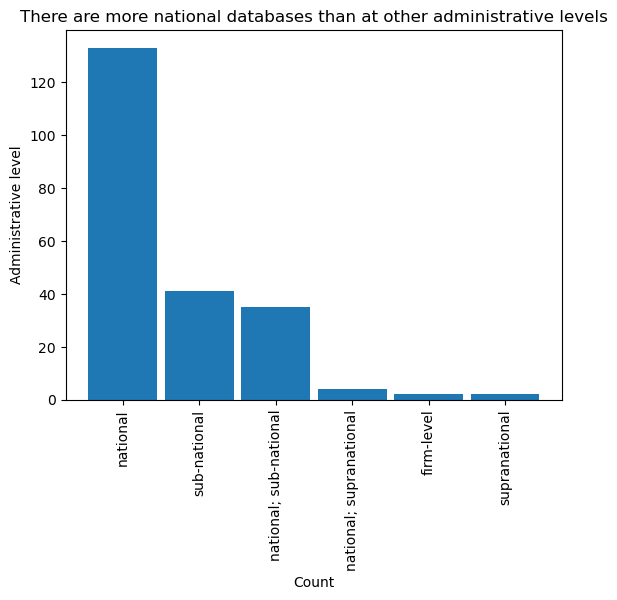

In [2410]:
# Makes barchart for the level of observation counts
plt.figure()
plt.bar(entries_by_administrative_level.index, entries_by_administrative_level['Count'], width = 0.9)
plt.xticks(rotation=90)
plt.title('There are more national databases than at other administrative levels')
plt.xlabel('Count')
plt.ylabel('Administrative level')
plt.show()

<div class="alert-info">
On a simple count it looks like the Covid policy monitors around the world were focused on following what national governments were doing. Three times as many tracked at the national level than the sub-national one, despite the latter probably having meaningful powers to affect the pandemic in many countries. Perhaps this is because it was easier for researchers to follow and measure the policy decisions of national governments. 
    
<br>
    
The national-focused datasets are likely where much of the internationally comparative work on Covid will take place, but let's look first at a couple of the oddities in the Oxford Supertracker: the supranational and firm-level datasets.      
    
</div>

In [2411]:
# Finds the supranational datasets
supranational_datasets = oxford_supertracker[oxford_supertracker['Level of Observation'] == 'supranational']

# Shows the supranational datasets
supranational_datasets 

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
19,EU and euro area level measures,https://www.europarl.europa.eu/RegData/etudes/...,Macroeconomic and Financial Policy; Social and...,measures proposed and taken at the EU or euro...,Europe; EU,pdf,[European Parliament](https://twitter.com/euro...,Policy Tracker,supranational,2020-03-11,2021-03-08,Governmental agencies; International organisat...,NaN,West Europe; Eastern Europe & Central Asia; Eu...,European Union
119,ILO Monitor: COVID-19 and the world of work.,https://www.ilo.org/wcmsp5/groups/public/---dg...,Social and Employment Policy,Change in employment and working hours by regi...,worldwide,pdf,[ILO](https://twitter.com/ilo),NaN,supranational,2020-01-01,2020-06-30,International organisations; Academics,NaN,worldwide; Sub-Saharan Africa; East Asia & Pac...,International organisations


<div class="alert-info">
The dataframe with the two supranational datasets shows us that the naming seems to be based on the type of organisation doing the data collecting. For these two, it's the European Parliament tracking policy decisions across member states of the European Union, and the International Labour Organization (ILO) following social and employment actions across the world. Let's have a look at both. 
    
<br>
    
According to the ILO's <a href="https://ilo.org/global/topics/coronavirus/regional-country/country-responses/lang--en/index.htm" target="_blank">page</a> on its tracker of Covid country policy responses, the policy actions of 188 governments, employers' and workers's bodies were tracked from 2020 to 2022. The policy reporting methodology is shown below.   
   
</div>

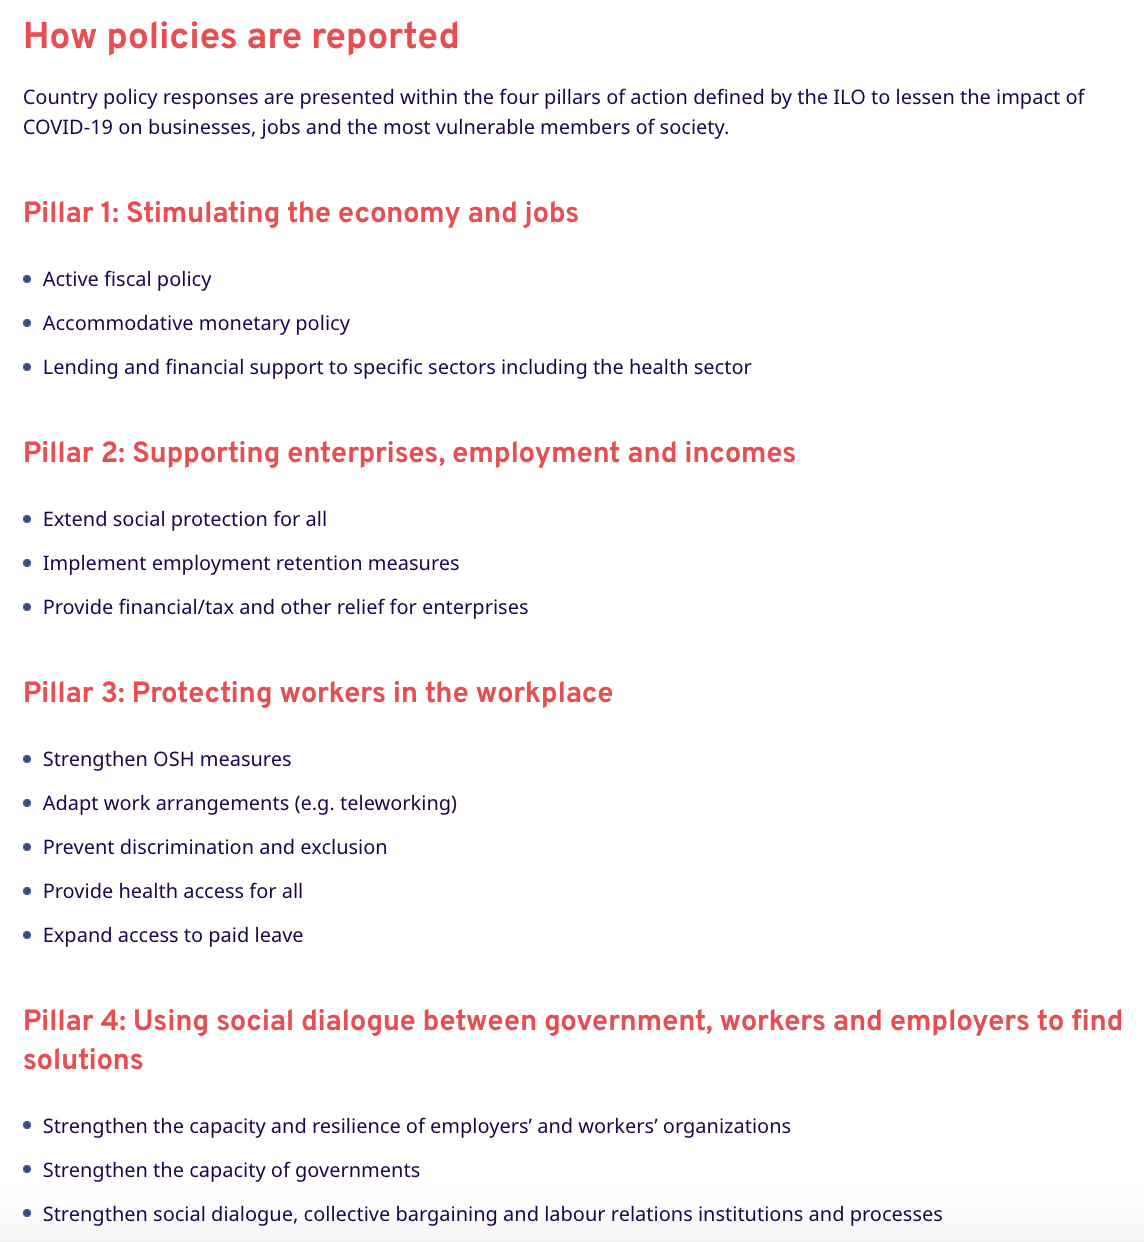

<div class="alert-info">
And let's now look at the firm-level datasets.    
   
</div>

In [2412]:
# Finds the firm-level datasets
supranational_datasets = oxford_supertracker[oxford_supertracker['Level of Observation'] == 'firm-level']

# Shows the the firm-level datasets
supranational_datasets 

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
27,Firm-level risk Covid-19 exposure,https://sites.google.com/view/firmrisk/home?au...,Macroeconomic and Financial Policy,"firm-level measures of exposure, risk, and se...",worldwide; ARG; AUS; AUT; BHS; BHR; BGD; BEL; ...,csv; tsv; dta,[Stephan Hollan](https://twitter.com/StephanHo...,Policy Tracker,firm-level,2002-01-01,2021-03-31,Academics,NaN,worldwide; Sub-Saharan Africa; East Asia & Pac...,Academics
28,Covid Stimulus Watch,https://covidstimuluswatch.org/,Macroeconomic and Financial Policy; Social and...,strengthen corporate accountability. It assem...,USA,html; csv; xlsx,[Good Jobs First](https://twitter.com/GoodJobs...,Policy Tracker,firm-level,2020-04-30,up-to-date,Think tanks; Companies,NaN,North America,NGOs


<div class="alert-info">
The first dataset, <a href="https://sites.google.com/view/firmrisk/home?authuser=0" target="_blank">firm-level risk</a>, used text analysis to follow the sentiment towards, and risk-based views of, listed firms towards the pandemic in a collection of countries around the world to March 2021. This could, interestingly, be used to gauge the views of informed companies as to the ability of their national government to achieve the policy aims stated by officials. 
    
<br>
 
The second dataset, <a href="https://covidstimuluswatch.org/" target="_blank">Covid Stimulus Watch</a>, is a markedly different tracker. It monitored financial support provided to companies by US legislation over the pandemic.   
    
<br>
Let's also have a quick look at the next two categories with the fewest counts, and also the most confusing titles: 'national; sub-national'; and 'national; supranational'. What are these ones about?
   
</div>

In [2413]:
# Finds the national-subnational datasets
national_subnational_datasets = oxford_supertracker[oxford_supertracker['Level of Observation'] == 'national; sub-national']

# Shows the national-subnational datasets
national_subnational_datasets

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
3,CoronaNet research project,https://coronanet-project.org,Non-Pharmaceutical Interventions; Health and C...,"includes 40,000 entries on policy announceme...",worldwide; AFG; ALB; DZA; AND; AGO; ATG; ARG; ...,csv; xlsx,[CoronaNet Research Project](https://twitter.c...,Policy Tracker,national; sub-national,2020-01-01,up-to-date,Governmental agencies; Media; Academics,NaN,worldwide; Sub-Saharan Africa; East Asia & Pac...,Academics
4,Complexity Science Hub COVID-19 Covid-19 Contr...,http://covid19-interventions.com/,Non-Pharmaceutical Interventions,non-pharmaceutical interventions (NPIs) to st...,worldwide; ALB; AUT; BEL; BIH; BRA; CAN; HRV; ...,csv,[Complexity Science Hub Vienna](https://twitte...,Policy Tracker,national; sub-national,2020-01-01,2021-03-31,Governmental agencies; International organisat...,NaN,worldwide; West Europe; North America; East As...,Academics
5,Health Intervention Tracking for COVID-19 (HIT...,https://akuko.io/post/covid-intervention-tracking,Non-Pharmaceutical Interventions; Health and C...,documents public health policy interventions ...,worldwide; AFG; ASM; ARG; AUS; AZE; BHR; BGD; ...,html; csv,[Johns Hopkins Bloomberg School of Public Heal...,Policy Tracker,national; sub-national,2020-01-01,2021-05-19,Governmental agencies; International organisat...,NaN,worldwide; Sub-Saharan Africa; East Asia & Pac...,Academics
6,Coronavirus containment measures,https://github.com/OlivierLej/Coronavirus_Coun...,Non-Pharmaceutical Interventions,containment measures incl. a stringency index ...,worldwide; AFG; ALB; DZA; AND; AGO; ATG; ARG; ...,csv;,[Olivier Lejeune](https://twitter.com/O_LJ),Policy Tracker,national; sub-national,2020-01-23,2020-11-15,Governmental agencies; International organisat...,NaN,worldwide; West Europe; North America; East As...,Academics
8,socialdistancing.stanford.edu,http://socialdistancing.stanford.edu,Non-Pharmaceutical Interventions,county-level nonpharmaceutical interventions ...,USA,csv; xlsx,[Stanford HCI group](https://twitter.com/Stanf...,Policy Tracker,national; sub-national,2020-03-11,2020-05-15,Governmental agencies; Media,NaN,North America,Academics
9,COVID Analysis and Mapping of Policies (AMP) site,https://covidamp.org/,Non-Pharmaceutical Interventions,non-pharmaceutical interventions. Available o...,ARG; AUS; BOL; BWA; BRA; CAN; TCD; COL; COG; D...,html; xlsx,[Georgetown Global Health Science & Security](...,Policy Tracker,national; sub-national,2020-01-01,up-to-date,Governmental agencies,NaN,worldwide; West Europe; North America; East As...,Academics
25,The Opportunity Insights Economic Tracker,https://tracker.opportunityinsights.org/,Macroeconomic and Financial Policy; Social and...,"real time tracking of employment, unemploymen...",USA,html; non-downloadable,[Opportunity Insights](https://twitter.com/Opp...,Policy Tracker,national; sub-national,2020-01-15,2021-03-31,Think tanks; Companies,NaN,North America,Think tanks
50,"Cambridge Core Health Economics, Policy and La...",https://www.cambridge.org/core/blog/tag/countr...,Health and Care Policy,health and social care policy issues on the n...,worldwide; USA; ALB; AUS; AUT; BEL; BRA; BGR; ...,html; non-downloadable,[Cambridge Core](https://twitter.com/Cambridge...,Policy Tracker,national; sub-national,2020-04-03,2020-08-13,Academics,NaN,worldwide; East Asia & Pacific; Eastern Europe...,Academics
51,Visualizing regional socioeconomic indicators ...,https://covid19.iiasa.ac.at/interactive/,Health and Care Policy; Social and Employment ...,"socioeconomic indicators at the state-level, ...",EU; ALB; AUT; BEL; BIH; BGR; HRV; CYP; DNK; ES...,html; non-downloadable,[IIASA Vienna](https://twitter.com/IIASAVienna...,Policy Tracker,national; sub-national,2020-03-10,up-to-date,International organisations; Academics; Think ...,NaN,West Europe; Eastern Europe & Central Asia,Academics
53,

In [2414]:
# Finds the national-supranational datasets
national_supranational_datasets = oxford_supertracker[oxford_supertracker['Level of Observation'] == 'national; supranational']

# Shows the national-supranational datasets
national_supranational_datasets

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
20,Economic Policy Response Map,https://sites.google.com/view/atanaspekanov/ec...,Macroeconomic and Financial Policy,fiscal and wider liquidity measures by EU go...,EU; AUT; BEL; DNK; EST; FIN; FRA; DEU; IRL; IT...,html; non-downloadable,[Atanas Pekanov](https://twitter.com/atanaspek...,Policy Tracker,national; supranational,2020-03-13,2020-03-20,Governmental agencies; International organisat...,NaN,European Union; West Europe; Eastern Europe & ...,Academics
41,COVID-19 EU PolicyWatch,https://www.eurofound.europa.eu/data/covid-19-...,Social and Employment Policy,social and employment policy responses of gov...,EU; AUT; BEL; BGR; HRV; CYP; DNK; EST; FIN; FR...,html; csv; json,[Eurofound](https://twitter.com/eurofound),Policy Tracker,national; supranational,2020-03-31,up-to-date,Governmental agencies; International organisat...,NaN,European Union; West Europe; Eastern Europe & ...,European Union
43,ETUC Briefing Notes,https://t.co/tGCy28L9qo?amp=1,Social and Employment Policy; Civic Freedom an...,"short-time work, social protection, employmen...",AUT; BEL; BGR; HRV; CYP; DNK; EST; FIN; FRA; D...,pdf,[ETUC](https://twitter.com/etuc_ces);\n ...,Policy Tracker,national; supranational,2020-03-27,2021-02-16,Governmental agencies; International organisat...,NaN,West Europe; Eastern Europe & Central Asia,NGOs
80,Solidarity amid the COVID-19 crisis,https://civicspacewatch.eu/covid-19/,Civic Freedom and Human Rights,civil society's and NGOss actions and demands,AUT; BEL; BGR; HRV; CZE; FRA; DEU; GRC; HUN; I...,html; non-downloadable,[European Civic Forum](https://twitter.com/For...,Policy Tracker,national; supranational,2020-04-30,up-to-date,Think tanks; Media,NaN,West Europe; Eastern Europe & Central Asia; Eu...,NGOs


<div class="alert-info">
The distinction between the levels of observation of a dataset doesn't seem to have been specified by the <a href="https://supertracker.spi.ox.ac.uk/" target="_blank">Oxford Supertracker</a>, and as shown by the screenshots below of the form for submitting policy trackers, it wasn't a characteristic that users could assert. 
   
</div>

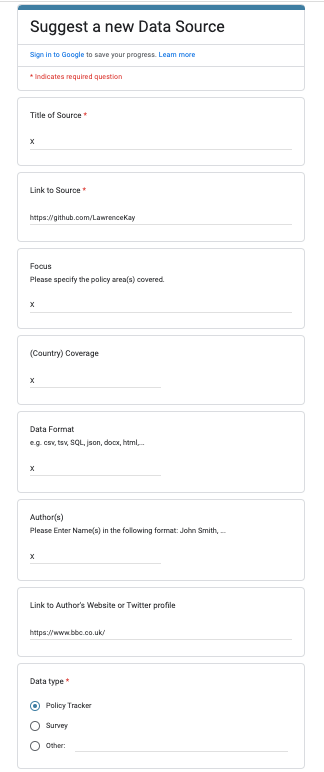

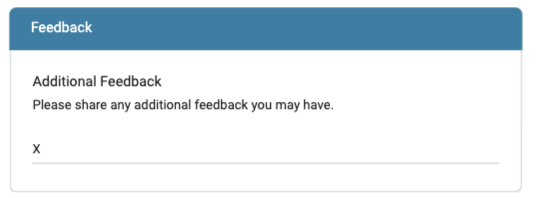

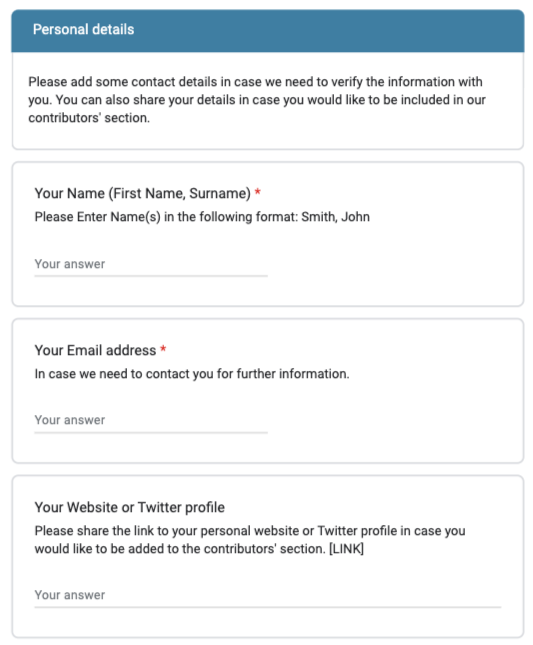

<div class="alert-info">
Given that there don't seem to be guidelines for what makes a dataset specific to one level of observation or another, it must have been determined by the editors of the tracker. Let's investigate what they decided, starting with the 'national; supranational datasets' as there are only four of them:
<br>    
      
- The <a href="https://civicspacewatch.eu/covid-19?_sf_s=economic" target="_blank">Civic Space Watch</a> by the European Civic Forum data doesn't seem to be accessible anymore. 
- The <a href="https://sites.google.com/view/atanaspekanov/economic-policy-response-map" target="_blank">Economic Policy Response Map</a> doesn't appear to have been completed. 
- The <a href="https://www.etuc.org/en/publication/covid-19-watch-etuc-briefing-notes" target="_blank">ETUC Briefing notes</a> is just a series of PDF briefings on labour and occuptaional health issues that arose during the pandemic, focused on European nations.  
- The <a href="https://www.eurofound.europa.eu/data/covid-19-eu-policywatch" target="_blank">COVID-19 EU PolicyWatch</a> is a list of measures and a database on the policies adopted by European Union governments as they sought to mitigate the effects of the pandemic on workers and companies.
    
What's the the theme that unites all of them? They focus on activities in European Union countries through a continent-wide lens. 'Supranational: European Union' would be a more accurate description of the observation level of the datasets. 
    
<br>  
What about the 'national; sub-national' ones? They're easier, in that each one has data at the national level for select countries, as well as the sub-national one for often a small subset. Most of the datasets are focused on the United States, many are just textual descriptions of policy decisions, and a good number seem to have not been maintained beyond an arbitrary point in 2020. The following will be removed as the data is no longer available at the listed links: 
    
- <a href="https://en.kedid.org/research/programs/govrm-covid19/" target="_blank">Observatory of Government Restrictive Measures for the COVID-19 pandemic (GovRM-COVID19)</a>.
- <a href="https://ww16.kenyacovidtracker.org/?sub1=20230711-0322-31b7-8f60-01b4a77bc73e" target="_blank">Kenya COVID-19 Economic Tracker</a>.
- <a href="https://akuko.io/post/covid-intervention-tracking" target="_blank">Health Intervention Tracking for COVID-19 </a>.
- <a href="https://www.dallasfed.org/research/sdi.aspx" target="_blank">The Dallas Fed Social Distancing Index</a>.
</div>

In [2415]:
# Locates the entries to be dropped
entries_to_drop = oxford_supertracker.iloc[[5,74,161,167]]

# Shows entries
entries_to_drop 

,Title,Link,Policy Area,Focus,Country Coverage,Data Format,Authors,Type,Level of Observation,Start Date,End Date,Source,Language,World Region,Provider
5,Health Intervention Tracking for COVID-19 (HIT...,https://akuko.io/post/covid-intervention-tracking,Non-Pharmaceutical Interventions; Health and C...,documents public health policy interventions ...,worldwide; AFG; ASM; ARG; AUS; AZE; BHR; BGD; ...,html; csv,[Johns Hopkins Bloomberg School of Public Heal...,Policy Tracker,national; sub-national,2020-01-01,2021-05-19,Governmental agencies; International organisat...,NaN,worldwide; Sub-Saharan Africa; East Asia & Pac...,Academics
74,The Dallas Fed Social Distancing Index,https://www.dallasfed.org/research/sdi.aspx,Behavioural Responses and Mobility,"data is available on a federal level, a state-...",USA,csv,[Dallas Fed](https://twitter.com/DallasFed),Policy Tracker,national; sub-national,2020-01-04,2021-03-31,Governmental agencies,NaN,North America,Governmental agencies
161,Observatory of Government Restrictive Measures...,https://en.kedid.org/research/programs/govrm-c...,Non-Pharmaceutical Interventions; Civic Freedo...,Government measures to contain COVID-19 pandem...,FRA; DEU; GRC; ITA; GBR; USA,csv; xlsx,[Alexandros Kyriakidis](https://en.kedid.org/p...,Policy Tracker,national; sub-national,2020-03-11,up-to-date,Governmental agencies; Media,NaN,West Europe; North America,Academics
167,Kenya COVID-19 Economic Tracker,https://www.kenyacovidtracker.org/,Non-Pharmaceutical Interventions; Collection o...,Provides the evolution of events and governmen...,KEN,html; non-downloadable,[Blastus Bwire](https://www.linkedin.com/in/bl...,Policy Tracker,national; sub-national,2020-03-13,up-to-date,Governmental agencies; International organisat...,NaN,Sub-Saharan Africa,Academics; Think tanks


In [2416]:
# Drops entries
oxford_supertracker = oxford_supertracker.drop([5,74,161,167], inplace = True)

# Continue from here

In [2418]:
# Checks the change
oxford_supertracker.head(10)

AttributeError: 'NoneType' object has no attribute 'head'

In [ ]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [ ]:
# Checks the change
oxford_supertracker.head(10)

In [ ]:
# Counts the remaining number of datasets, by rows
len(oxford_supertracker)

<div class="alert-info">
Having removed four missing datasets we're now down to 228 of them.
<br>
    
We've been through the four least populous categories and can be confident that the datasets in them have been labelled properly re their levels of observation. Let's move on to the sub-national ones.  
   
</div>

In [ ]:
# Finds the subnational datasets
subnational_datasets = oxford_supertracker[oxford_supertracker['Level of Observation'] == 'sub-national']

# Shows the subnational datasets
subnational_datasets

In [ ]:
# Counts the number of datasets, by rows
len(subnational_datasets)

<div class="alert-info">
There are 41 datasets categorised as 'sub-national', which is great, but it also creates a problem: having to go through them to judge how the category has been applied while also weeding out the missing ones. We know from the steps above that re-categorisations can be necessary, and that there are dead links. 
    
<br>
As we're only interested in numeric data and the 'Data Format' column and looking at respective links shows that quite a few of the datasets are actually PDFs. We can't use those for quantitative analysis, so let's drop them. 
   
</div>

In [ ]:
# Shows the entries for the data formats
oxford_supertracker['Data Format'].unique()

In [ ]:
# Shows the number of unique data format entries
len(oxford_supertracker['Data Format'].unique())

In [ ]:
# Finds the entries listed as only 'pdf'
oxford_supertracker[oxford_supertracker['Data Format'] == 'pdf']

<div class="alert-info">
Unfortunately there are 53 unique types of data format - or combinations of format - in the dataset. And only six of them are solely PDF ones. Let's drop those first. 
</div>

In [ ]:
# Drops PDF only entries
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Data Format'] == 'pdf'].index)

In [ ]:
# Checks the change
oxford_supertracker

<div class="alert-info">
We're now down to 222 entries. To judge whether to drop some more, let's find out which ones have 'pdf' entered as one of their formats.  
</div>

In [ ]:
# Finds entries with 'pdf' in the listed data formats
oxford_supertracker[oxford_supertracker['Data Format'].str.contains('pdf', na=False)]

<div class="alert-info">
We've still got some PDF-only entries, likely becuase they have white space or some other idiosyncratic aspect to them. Let's deal with that first. 
</div>

In [ ]:
# Strips white space from the Data Format column 
oxford_supertracker['Data Format'].str.strip()

In [ ]:
# Drops PDF only entries
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Data Format'] == 'pdf'].index)

In [ ]:
# Finds entries with 'pdf' in the listed data formats
oxford_supertracker[oxford_supertracker['Data Format'].str.contains('pdf', na=False)]

<div class="alert-info">
Okay, stripping whitespace didn't work so we'll remove them by hand as there aren't many.  
</div>

In [ ]:
# Drops the PDF-only entries
oxford_supertracker = oxford_supertracker.drop([11, 16, 18, 31, 33, 35, 42, 43, 47, 64, 65, 69, 70])

In [ ]:
# Checks the change
oxford_supertracker.head(20)

In [ ]:
# Finds entries with 'pdf' in the listed data formats
oxford_supertracker[oxford_supertracker['Data Format'].str.contains('pdf', na=False)]

<div class="alert-info">
The latest steps leave us with entries that have PDF in their formats, but also numeric information that could be useful. We'll need to go through the sources to see how useful they are. 
    
<br>
    
The following need to be deleted as they don't have any data in a readable format. 
    
- Row 10, COVID19 Global Travel Navigator.
- Row 15, Eastern Europe Coronavirus tracker.
- Row 23, Policy Responses to COVID-19 in Asia and the Pacific.
- Row 59, COVID-19 Open Research Dataset (CORD-19).
- Row 74, Open COVID-19 policy dataset.
- Row 113, ECFR's European Solidarity Tracker.
- Row 173, IndustriAll Europe COVID-19 Monitor.
- Row 204, COVID-19 Trade Facilitation Resource Repository.  
<br> 
    
And the ones below need amendments made to them: 
    
- Row 29: Real Time Population Survey, which offers data in the 'xlsx' format. 
- Row 87: Vera Institute of Justice prison data, which offers data in the 'csv' format. 
- Row 92: UNDP HDR Global Preparedness and Vulnerability Dashboard, for which the link is now https://hdr.undp.org/sites/default/files/2020-21/preparedness_vulnerability_dashboards_12.xlsx.


</div>

In [ ]:
# Shows dataframe
oxford_supertracker

In [ ]:
# Drops non-numeric entries
oxford_supertracker = oxford_supertracker.drop([10,15,23,59,74,113,173,204])

In [ ]:
# Checks change
oxford_supertracker.head(30)

In [ ]:
# Adds the XLSX format to the entry
oxford_supertracker.loc[29,'Data Format'] = ' html; pdf; xlsx'

In [ ]:
# Checks change
oxford_supertracker.loc[29,'Data Format']

In [ ]:
# Adds the CSV format to the entry
oxford_supertracker.loc[87,'Data Format'] = ' html; pdf; csv'

In [ ]:
# Checks change
oxford_supertracker.loc[87,'Data Format']

In [ ]:
# Changes the link for the entry
oxford_supertracker.loc[92,'Link'] = 'https://hdr.undp.org/sites/default/files/2020-21/preparedness_vulnerability_dashboards_12.xlsx'

In [ ]:
# Checks change
oxford_supertracker.loc[92,'Link']

In [ ]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

In [ ]:
# Shows dataframe
oxford_supertracker

<div class="alert-info">
We're now down to 201 entries, each of which has a dataset attached to it. 
    
<br>
    
As we're looking for datasets that researchers can use and have got rid of PDF-based sources of information, let's take the next step and delete any entry that has been marked as 'non-downloadable'.    
</div>

In [ ]:
# Finds entries with 'pdf' in the listed data formats
non_downloadable_entries = oxford_supertracker[oxford_supertracker['Data Format'].str.contains('non-downloadable', na=False)]

In [ ]:
# Shows the non-downloadable entries
non_downloadable_entries

<div class="alert-info">
66 is a lot of datasets. Let's have a look at a selection of them to see if they really aren't making their data available for others to use.  
<br>
    
From a quick look at a few of the entries, ones like <a href="https://www.oecd.org/tax/tax-policy-reforms-26173433.htm" target="_blank">OECD Tax Policy Reforms 2021</a>, <a href="https://www.aei.org/covid-2019-action-tracker/" target="_blank">AEI COVID-19 Tracker</a>, and <a href="https://www.imf.org/en/Topics/imf-and-covid19/Policy-Responses-to-COVID-19" target="_blank">IMF policy tracker</a> all seem to be just websites with text on them, and no datasets to download. That's probably obvious from their 'html; non-downloadable' tags in the 'Data Format' column, but before we remove them all let's check if there are any other types of formats that are also noted as not for downloading. 
    

</div>

In [ ]:
# Finds the number of types of unique entries in the 'Data Format' column
non_downloadable_entries['Data Format'].nunique()

In [ ]:
# Finds which are the types of data entry
non_downloadable_entries['Data Format'].unique()

<div class="alert-info">
We just need to remove all rows with 'non-downloadable' in their data format strings. 
</div>

In [ ]:
# Drops all rows with 'non-downloadable' data formats
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Data Format'].str.contains('non-downloadable', na=False)].index)

In [ ]:
# Checks change
oxford_supertracker

In [ ]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

<div class="alert-info">
We're now down to just 135 entries, which is what we were expecting after the last few steps. It's a big chunk to lose from what we might have expected the total size of the dataset to be. 
<br>
    
Given that so many of the dropped entries have 'html' in their data descriptions, let's have a look at how many don't have data to download.  
</div>

In [ ]:
# Finds all rows with 'html' in the Data Format column
html_entries = oxford_supertracker[oxford_supertracker['Data Format'].str.contains('html', na=False)]

# Shows html entries
html_entries

In [ ]:
# Counts the number of unique types of entry in the Data Format column
html_entries['Data Format'].nunique()

In [ ]:
# Shows the types of unique entry
html_entries['Data Format'].unique()

<div class="alert-info">
Around 70 entries have 'html' listed as one of their formats. This isn't a problem as long as they have other formats which have readable data, such as 'xlsx' and 'csv'. From looking at the list of types, we'll only need to remove the one type that has no such data formats: entries that are listed as just 'html'.
</div>

In [ ]:
# Finds the html-only entries
html_only_entries = oxford_supertracker[oxford_supertracker['Data Format'] == 'html']

In [ ]:
# Counts the number of html-only entries
len(html_only_entries)

<div class="alert-info">
We're now going to drop a further 34 entries. 
</div>

In [ ]:
# Drops html only entries
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Data Format'] == 'html'].index)

In [ ]:
# Checks the change
oxford_supertracker[oxford_supertracker['Data Format'] == 'html']

<div class="alert-info">
How many datasets do we have remaining? 
</div>

In [ ]:
# Counts the number of entries
len(oxford_supertracker)

<div class="alert-info">
Just over one hundred! That's a big cut from the original number of entries on the Oxford Supertracker. 
<br>

Let's find out what our number and distribution of datasets now looks like, across the level of observation that we have been interested in. 
   
</div>

In [ ]:
# Gets the number of entries by the level of observation
entries_by_administrative_level_updated = oxford_supertracker.groupby('Level of Observation').size()

# Puts the count into a dataframe
entries_by_administrative_level_updated  =  pd.DataFrame(entries_by_administrative_level_updated )

# Renames first column 
entries_by_administrative_level_updated.rename(columns = {0: 'Count'}, inplace = True)

# Sorts by the count column
entries_by_administrative_level_updated  = entries_by_administrative_level_updated .sort_values(by = ['Count'], ascending = False)

# Shows counts
entries_by_administrative_level_updated 

<div class="alert-info">
The datasets remaining are still dominated by national and sub-national ones, but we've lost a good number of entries in both. 
   
</div>

In [ ]:
# Makes an updated barchart for the level of observation counts
plt.figure()
plt.bar(entries_by_administrative_level_updated .index, entries_by_administrative_level_updated ['Count'], width = 0.9)
plt.xticks(rotation=90)
plt.title('There are more national databases than at other administrative levels')
plt.xlabel('Count')
plt.ylabel('Administrative level')
plt.show()

In [ ]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

<div class="alert-info">
Given that we're down to a meta-dataset of only 101 entries, we can start to look at them individually to clean out any remaining ones that won'be be useful.
   
</div>

In [ ]:
# Shows the top half of the dataset
oxford_supertracker.head(50)

In [ ]:
# Shows the bottom half of the dataset
oxford_supertracker.tail(50)

<div class="alert-info">
There are some atypical entries in the Data Format column so let's deal with them. 
</div>

In [ ]:
# Removes the errant semi-colon in one row
oxford_supertracker.loc[5, 'Data Format'] = 'csv'

In [ ]:
oxford_supertracker.loc[5, 'Data Format']

<div class="alert-info">
Let's also look for and remove any null values. 
</div>

In [ ]:
# Counts the number of null values in the Data Format column
oxford_supertracker['Data Format'].isna().sum(axis = 0)

<div class="alert-info">
Row 66, the <a href="https://evictionlab.org/covid-policy-scorecard/" target="_blank">COVID-19 Housing Policy Scorecard</a> is the one with a null entry in the Data Format column. It should actually be labelled 'html; pdf' so needs to be removed anyway. 
</div>

In [ ]:
# Drops row 66
oxford_supertracker = oxford_supertracker.drop([66])

In [ ]:
# Checks the change by counting the number of null values in the Data Format column
oxford_supertracker['Data Format'].isna().sum(axis = 0)

In [ ]:
# Counts the number of rows
len(oxford_supertracker)

<div class="alert-info">
There are 100 entries left! But we now need to cull more of them. Having checked all of the entries for whether there was data available - but not the quality of it - and in a machine-readable format, the following sites fail the test for one reason or another and need to be removed:
<br>
    
- <a href="https://www.acaps.org/en/thematics/all-topics/covid-19" target="_blank">COVID19 Government Measures Dataset</a> doesn't seem to be maintained and the data does not download. 

- <a href="http://socialdistancing.stanford.edu" target="_blank">socialdistancing.stanford.edu</a> doesn't seem to have been maintained, or the project completed to provide a downloadable dataset. 

- <a href="https://read.oecd-ilibrary.org/view/?ref=119_119689-ud5comtf84&title=Beyond_Containment:Health_systems_responses_to_COVID-19_in_the_OECD" target="_blank">OECD Health System responses summary</a> is just a PDF and needs to be deleted.
    
- <a href="https://covid19.apple.com/mobility" target="_blank">Apple Mobility Trends Reports</a> are no longer available. 
 
- <a href="https://www.kaggle.com/jannalipenkova/covid19-public-media-dataset" target="_blank">COVID-19 Public Media Dataset</a> is no longer available.
    
- <a href="https://docs.google.com/document/d/1QMEOe7NC1wpSx3jLDBohxXja-cN4M5A8ctg8fbLrOcs/edit" target="_blank">Impact:Peace resources on COVID-19</a> is just a docx file and needs to be removed. 
    
- <a href="https://epictracker.org/" target="_blank">EPIC Tracker</a> looks defunct and doesn't seem to have data to download. 
    
- <a href="https://www.citiesandregions.cn/research/Covid-19-Policy-Tracker" target="_blank">Covid-19 Policy Tracker</a> seems to be defunct. 
    
- <a href="https://www.greenrecoverytracker.org/" target="_blank">Green Recovery Tracker</a> doesn't seem to make its data available openly.
    
- <a href="http://epidemicforecasting.org/" target="_blank">Epidemic Forecasting: COVID-19</a> is no longer online. 
    
- <a href="https://www.a-good-reason.eu/" target="_blank">A good reason: A chronicle of stay-at-home orders in Europe</a> appears to be broken.
    
- <a href="https://foodresearch.org.uk/publications/covid-19-food-policy-in-south-africa-the-first-four-months/" target="_blank">Covid-19 Food Policy in South Africa - The First Four Months</a> doesn't have data to download. The same is true of <a href="https://foodresearch.org.uk/publications/covid-19-food-policy-in-england-the-first-four-months/" target="_blank">Covid-19 Food Policy in England - The First Four Months</a> and <a href="https://foodresearch.org.uk/publications/covid-19-food-policy-in-india-the-first-four-months/" target="_blank">Covid-19 Food Policy in India - The First Four Months</a>.    
<br>
    
The following entries need to have some of their details changed: 
    
- UNDP HDR Global Preparedness and Vulnerability Dashboard needs to change to <a href="https://hdr.undp.org/content/covid-19-and-human-development-exploring-global-preparedness-and-vulnerability" target="_blank">COVID-19 and Human Development: Exploring global preparedness and vulnerability</a>.
    
- <a href="https://www.healthcare-datenplattform.de/" target="_blank">Corona Daten Plattform</a> is also available in xlsx format.

- The link for <a href="https://www.ecdc.europa.eu/en/publications-data/response-measures-database-rmd" target="_blank">ECDC-JRC Response Measures Database</a> needs to be updated. 
    
- <a href="https://www.wto.org/english/tratop_e/covid19_e/covid_reports_e.htm" target="_blank">COVID-19 and World Trade</a> now points only to the standard WTO database, rather than any Covid-specific data. 
    
    
   
    
    
    

In [ ]:
# Drops COVID19 Government Measures Dataset 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'COVID19 Government Measures Dataset'].index)


In [ ]:
# Checks change
entry_check = oxford_supertracker.isin(['COVID19 Government Measures Dataset']).any().any()

# Prints check
entry_check

In [ ]:
# Drops socialdistancing.stanford.edu 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'socialdistancing.stanford.edu'].index)

In [ ]:
# Checks change
entry_check = oxford_supertracker.isin(['socialdistancing.stanford.edu']).any().any()

# Prints check
entry_check

In [ ]:
# Drops OECD Health System responses summary
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'OECD Health System responses summary'].index)


In [ ]:
# Checks change
entry_check = oxford_supertracker.isin(['OECD Health System responses summary']).any().any()

# Prints check
entry_check

In [ ]:
# Drops Apple Mobility Trends Reports
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'Apple Mobility Trends Reports'].index)


In [ ]:
# Checks change
entry_check = oxford_supertracker.isin(['Apple Mobility Trends Reports']).any().any()

# Prints check
entry_check

In [ ]:
# Drops COVID-19 Public Media Dataset
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'COVID-19 Public Media Dataset'].index)


In [ ]:
# Checks change
entry_check = oxford_supertracker.isin(['COVID-19 Public Media Dataset']).any().any()

# Prints check
entry_check

In [ ]:
# Drops Impact:Peace resources on COVID-19
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'Impact:Peace resources on COVID-19'].index)


In [ ]:
# Checks change
entry_check = oxford_supertracker.isin(['Impact:Peace resources on COVID-19']).any().any()

# Prints check
entry_check

In [ ]:
# Drops EPIC Tracker
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'EPIC Tracker'].index)


In [ ]:
# Checks change
entry_check = oxford_supertracker.isin(['EPIC Tracker']).any().any()

# Prints check
entry_check

In [ ]:
# Drops Covid-19 Policy Tracker
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'Covid-19 Policy Tracker'].index)


In [ ]:
# Checks change
entry_check = oxford_supertracker.isin(['Covid-19 Policy Tracker']).any().any()

# Prints check
entry_check

In [ ]:
# Drops Covid-19 Policy Tracker
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'Green Recovery Tracker'].index)


In [ ]:
# Checks change
entry_check = oxford_supertracker.isin(['Green Recovery Tracker']).any().any()

# Prints check
entry_check

In [ ]:
# Drops Epidemic Forecasting: COVID-19
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'Epidemic Forecasting: COVID-19'].index)


In [ ]:
# Checks change
entry_check = oxford_supertracker.isin(['Epidemic Forecasting: COVID-19']).any().any()

# Prints check
entry_check

In [ ]:
# Drops A good reason: A chronicle of stay-at-home orders in Europe
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'A Good Reason: A chronicle of stay-at-home orders in Europe '].index)


In [ ]:
# Checks change
entry_check = oxford_supertracker.isin(['A Good Reason: A chronicle of stay-at-home orders in Europe ']).any().any()

# Prints check
entry_check

In [ ]:
# Drops Covid-19 Food Policy in South Africa - The First Four Months
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'Covid-19 Food Policy in South Africa - The First Four Months'].index)


In [ ]:
# Checks change
entry_check = oxford_supertracker.isin(['Covid-19 Food Policy in South Africa - The First Four Months']).any().any()

# Prints check
entry_check

In [ ]:
# Drops Covid-19 Food Policy in England - The First Four Months 
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'Covid-19 Food Policy in England - The First Four Months'].index)


In [ ]:
# Checks change
entry_check = oxford_supertracker.isin(['Covid-19 Food Policy in England - The First Four Months']).any().any()

# Prints check
entry_check

In [ ]:
# Drops Covid-19 Food Policy in India - The First Four Months
oxford_supertracker = oxford_supertracker.drop(oxford_supertracker[oxford_supertracker['Title'] == 'Covid-19 Food Policy in India - The First Four Months'].index)


In [ ]:
# Checks change
entry_check = oxford_supertracker.isin(['Covid-19 Food Policy in India - The First Four Months']).any().any()

# Prints check
entry_check

In [ ]:
# Changes link entry
oxford_supertracker.loc[42, 'Link'] = 'https://hdr.undp.org/content/covid-19-and-human-development-exploring-global-preparedness-and-vulnerability'

In [ ]:
# Checks change
oxford_supertracker.loc[42, 'Link']

In [ ]:
# Changes data type entry
oxford_supertracker.loc[58, 'Data Format'] = ' csv; xlsx'

In [ ]:
# Checks change
oxford_supertracker.loc[58, 'Data Format']

In [ ]:
# Changes link entry
oxford_supertracker.loc[97, 'Link'] = 'https://www.ecdc.europa.eu/en/publications-data/response-measures-database-rmd'

In [ ]:
# Checks change
oxford_supertracker.loc[97, 'Data Format']

In [ ]:
# Resets the index
oxford_supertracker.reset_index(inplace= True, drop=True)

## Conclusion [NOTES]
<a id='Conclusion'></a>

Divide or drop the PDF from numeric datasets. Assess on open data standards? 

Add the Dallas Fed mobility index

Change description to 'data sources' rather than 'datasets' before dropping the PDFs. 

Add to pdf dropping that this ignores text mining

Drop html from the data formats, as it doesn't add anything? 